# Seattle Airbnb Analysis

## Section 1: Business Understanding

What are the tips and tricks for Airbnb beginner hosts?

Below are the questions that I will consider in this analysis:
1.  Should the price be the same during every month of the year?
2.  Should the price be the same for weekdays and weekends?
3.  When should you be worried that the ratings will negatively affect the ability to charge desired prices?

In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calendar

## Section 2: Data Understanding
The data for the analysis was obtained from the Kaggle: https://www.kaggle.com/airbnb/seattle/data

The data is broken into 3 datasets:
 - Listings - includes full descriptions and average review score
 - Reviews - includes unique id for each reviewer and detailed comments
 - Calendar - includes listing id and the price and availability for that day

In [221]:
df_reviews = pd.read_csv ("data/reviews.csv")
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [222]:
df_listings = pd.read_csv ("data/listings.csv")
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [223]:
df_calendar= pd.read_csv ("data/calendar.csv")
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [224]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


## Section 3: Prepare the data

In [225]:
# Convert date from string to datetime to match the natural format of the data
df_calendar.date = pd.to_datetime(df_calendar.date)
# Break out the month into a separate column for easier analysis
df_calendar ["month"] = pd.DatetimeIndex(df_calendar.date).month

### Explore Date Ranges
 - Examine the earliest date in the dataset
 - Examine the latest date in the dataset
 - Calculate the number of days in the dataset

In [226]:
df_calendar.date.min()

Timestamp('2016-01-04 00:00:00')

In [227]:
df_calendar.date.max()

Timestamp('2017-01-02 00:00:00')

In [228]:
num_days_in_dataset = (df_calendar.date.max()-df_calendar.date.min()).days
num_days_in_dataset

364

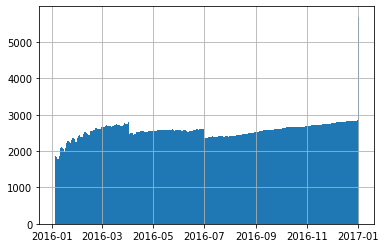

In [252]:
#View the number of listings -> the number of listings is the same across the entire range, this is not useful, let's dive deeper
df_calendar.date.hist(bins=num_days_in_dataset);

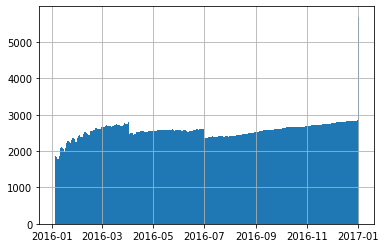

In [230]:
#View the number of listings that are available
df_calendar.query("available=='t'").date.hist(bins=num_days_in_dataset);

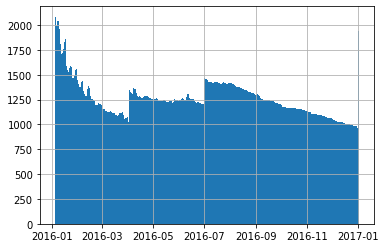

In [231]:
#View number of listings that are not available
df_calendar.query("available=='f'").date.hist(bins=num_days_in_dataset);

In [232]:
#Calculate percentage of data with no price
df_calendar.price.count()/(df_calendar.price.isna().sum() + df_calendar.price.count()) * 100

67.06100160020667

In [233]:
# Check the number of entries where price is missing
df_calendar.price.isna().sum()

459028

In [234]:
# Check if the number of missing prices corresponds to when the unit was not available for rent
df_calendar.query("available=='f'").available.count()

459028

In [235]:
# Drop rows with no price data, as missing values indicate that a property was not listed to be rented on those dates
# and thus is not interesting for our analysis
df_calendar = df_calendar.dropna()

In [236]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   listing_id  934542 non-null  int64         
 1   date        934542 non-null  datetime64[ns]
 2   available   934542 non-null  object        
 3   price       934542 non-null  object        
 4   month       934542 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 42.8+ MB


In [237]:
# Convert price to an int instead of a string
df_calendar["price_numerical"] = df_calendar.price.str[1:].str.replace (",","").astype(float)

In [238]:
df_calendar.describe()

,listing_id,month,price_numerical
count,9.345420e+05,934542.000000,934542.000000
mean,5.305517e+06,6.661120,137.944859
std,2.974821e+06,3.446401,105.062870
min,3.335000e+03,1.000000,10.000000
25%,2.875975e+06,4.000000,75.000000
50%,5.615620e+06,7.000000,109.000000
75%,7.873345e+06,10.000000,160.000000
max,1.034016e+07,12.000000,1650.000000


## Sections 4 and 5: Data Modelling and Evaluate the results

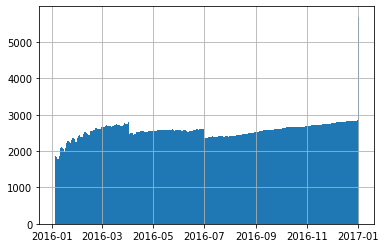

In [239]:
#View number of daily listings - there is some variation, but not much, could be due to change in regulation
df_calendar.date.hist(bins=num_days_in_dataset);

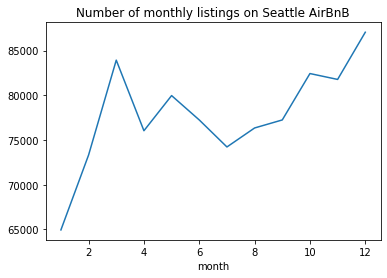

In [241]:
df_calendar.groupby("month").count().price.plot(title = "Number of monthly listings on Seattle AirBnB");

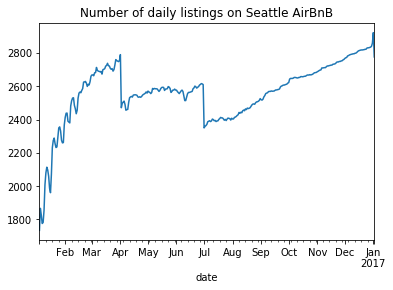

In [242]:
df_calendar.groupby("date").count().price.plot(title = "Number of daily listings on Seattle AirBnB");

### Q1: Should the price be the same during every month of the year?

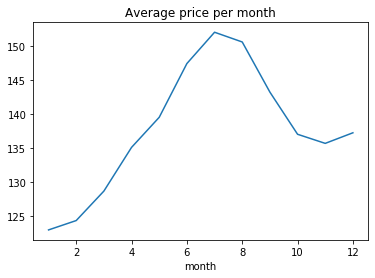

In [240]:
# View average price per month
df_calendar.groupby("month").price_numerical.mean().plot(title="Average price per month");

### A1: Summer months are the most expensive, followed by the shoulder seasons, fall has higher price as compared to spring

### Q2: Should the price be the same for weekdays and weekends?

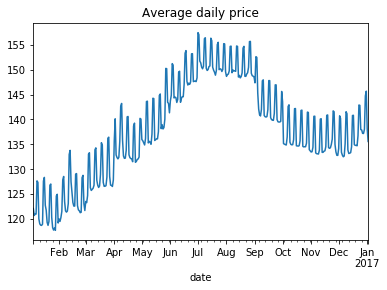

In [243]:
df_calendar.groupby("date").price_numerical.mean().plot(title = "Average daily price");

### Finding: There is weekly variability, but need to dive further down to see the exact trends

In [244]:
def get_xtickslabels (date_range):
    """Returns the day of the week labels for a specific time range"""
    labels = []
    for date in date_range:
        labels.append (calendar.day_name[date[0].weekday()])
    return labels

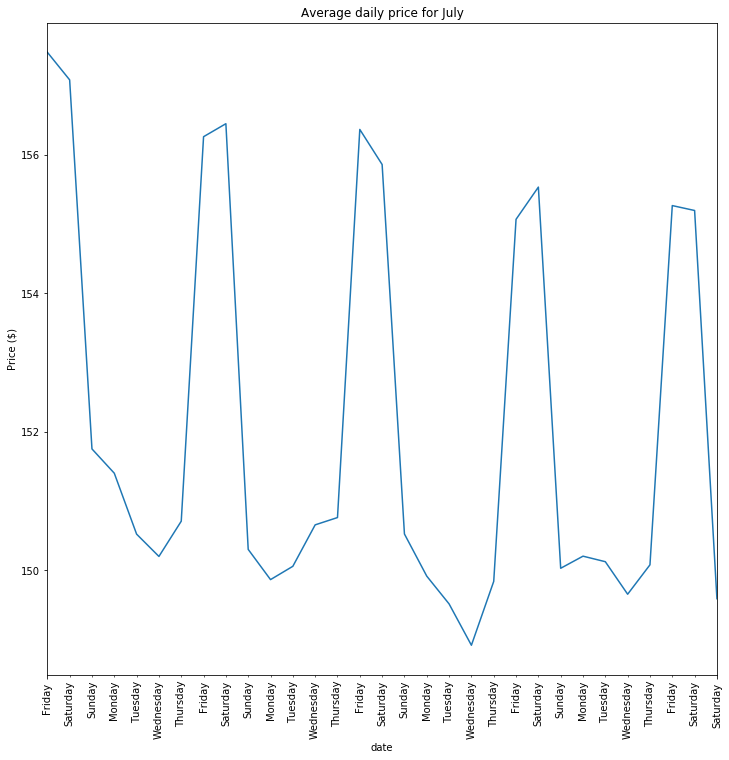

In [246]:
axes = df_calendar.query("month==7").groupby("date").price_numerical.mean().plot(title = "Average daily price for July", figsize = (12,12));
xticklabels = get_xtickslabels(df_calendar.query("month==7").groupby("date").date)
axes.set_ylabel ("Price ($)")
axes.set_xticklabels (xticklabels, rotation = 90);
axes.set_xticklabels (xticklabels [1:], minor = True, rotation = 90);

### Answer 2: There is a price increase for Friday and Saturday night listings

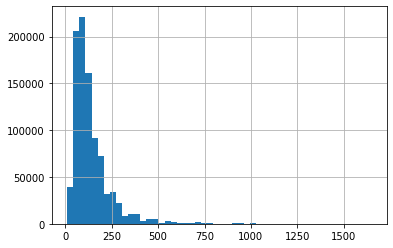

In [247]:
#View price breakdowns
df_calendar.price_numerical.hist(bins=50);

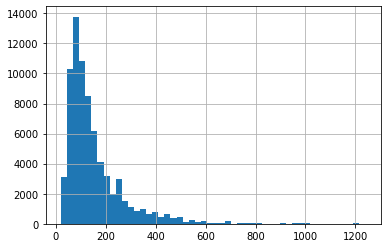

In [248]:
#View price breakdowns for July
df_calendar.query("month==7").price_numerical.hist(bins=50);

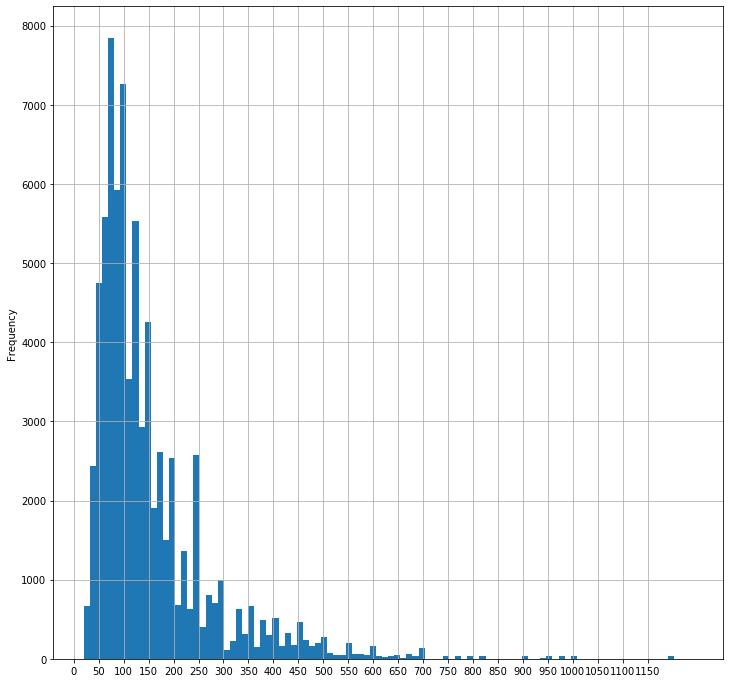

In [249]:
#View price breakdowns for July
df_calendar.query("month==7").price_numerical.plot(kind="hist", bins=100, xticks = np.arange(0, 1200, step=50), figsize = (12,12), grid = True);


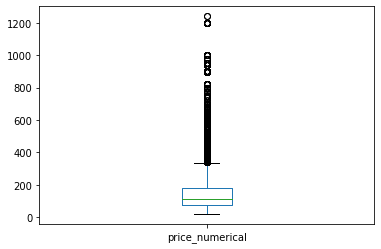

In [250]:
#View price breakdowns
df_calendar.query("month==7").price_numerical.plot(kind="box");

### Q3: When should you be worried that the ratings will negatively affect the ability to charge desired prices?

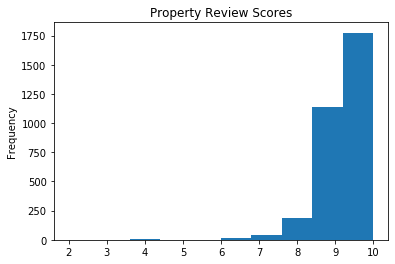

In [251]:
# View the breakdown of property review scores
df_listings.review_scores_value.plot(kind="hist", title = "Property Review Scores");

### A3: Anything lower than a 9 would be considered a poor rating as it falls in the bottom quarter of all rating values.